In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Based on features 2-384, we are trying to estimate Y

In [2]:
train_df = pd.read_csv('./data/raw/train_final.csv', index_col=0)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2603 entries, 1 to 2603
Columns: 384 entries, Y to 384
dtypes: float64(3), int64(381)
memory usage: 7.6 MB


In [4]:
train_df.describe()

,Y,2,3,4,5,6,7,8,9,10,...,375,376,377,378,379,380,381,382,383,384
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.0,2603.000000,2603.000000,2603.000000,2603.000000,...,2603.000000,2603.000000,2603.000000,2603.000000,2.603000e+03,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000
mean,0.223588,0.000768,0.463312,-46.734537,0.000768,0.0,0.275836,0.023434,0.000384,0.955436,...,0.024587,0.009604,0.057626,10.462159,-4.831460e+02,0.046101,1.327699,8.459086,0.012838,0.145371
std,0.416729,0.027714,0.498748,394.284920,0.027714,0.0,0.447020,0.151308,0.019600,0.206384,...,0.154893,0.097549,0.233079,157.720390,7.881655e+04,0.320014,1.230454,217.575720,2.054794,1.993433
min,0.000000,0.000000,0.000000,-3136.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,-2.395773e+06,0.000000,1.000000,1.000000,-7.077010,-6.675106
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.391000e+03,0.000000,1.000000,1.000000,-1.371932,-1.242102
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,3.646000e+03,0.000000,1.000000,1.000000,0.008485,0.263459
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,5.882000e+03,0.000000,1.000000,2.000000,1.428217,1.402053
max,1.000000,1.000000,1.000000,1175.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,4805.000000,8.443000e+03,11.000000,28.000000,11063.000000,7.003717,6.965393


In [18]:
def plot_dist(df, cols=8, figsize=(3,3)):
    rows = int(np.ceil(len(df.columns) /  cols))
    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    fig.set_figheight(figsize[1]*rows)
    fig.set_figwidth(figsize[0]*cols)
    for i in range(rows):
        for j in range(cols):
            col = df.columns[i*cols + j]
            ax[i, j].hist(df[col], bins=150)
            ax[i, j].set_title(col)

    
    plt.show()

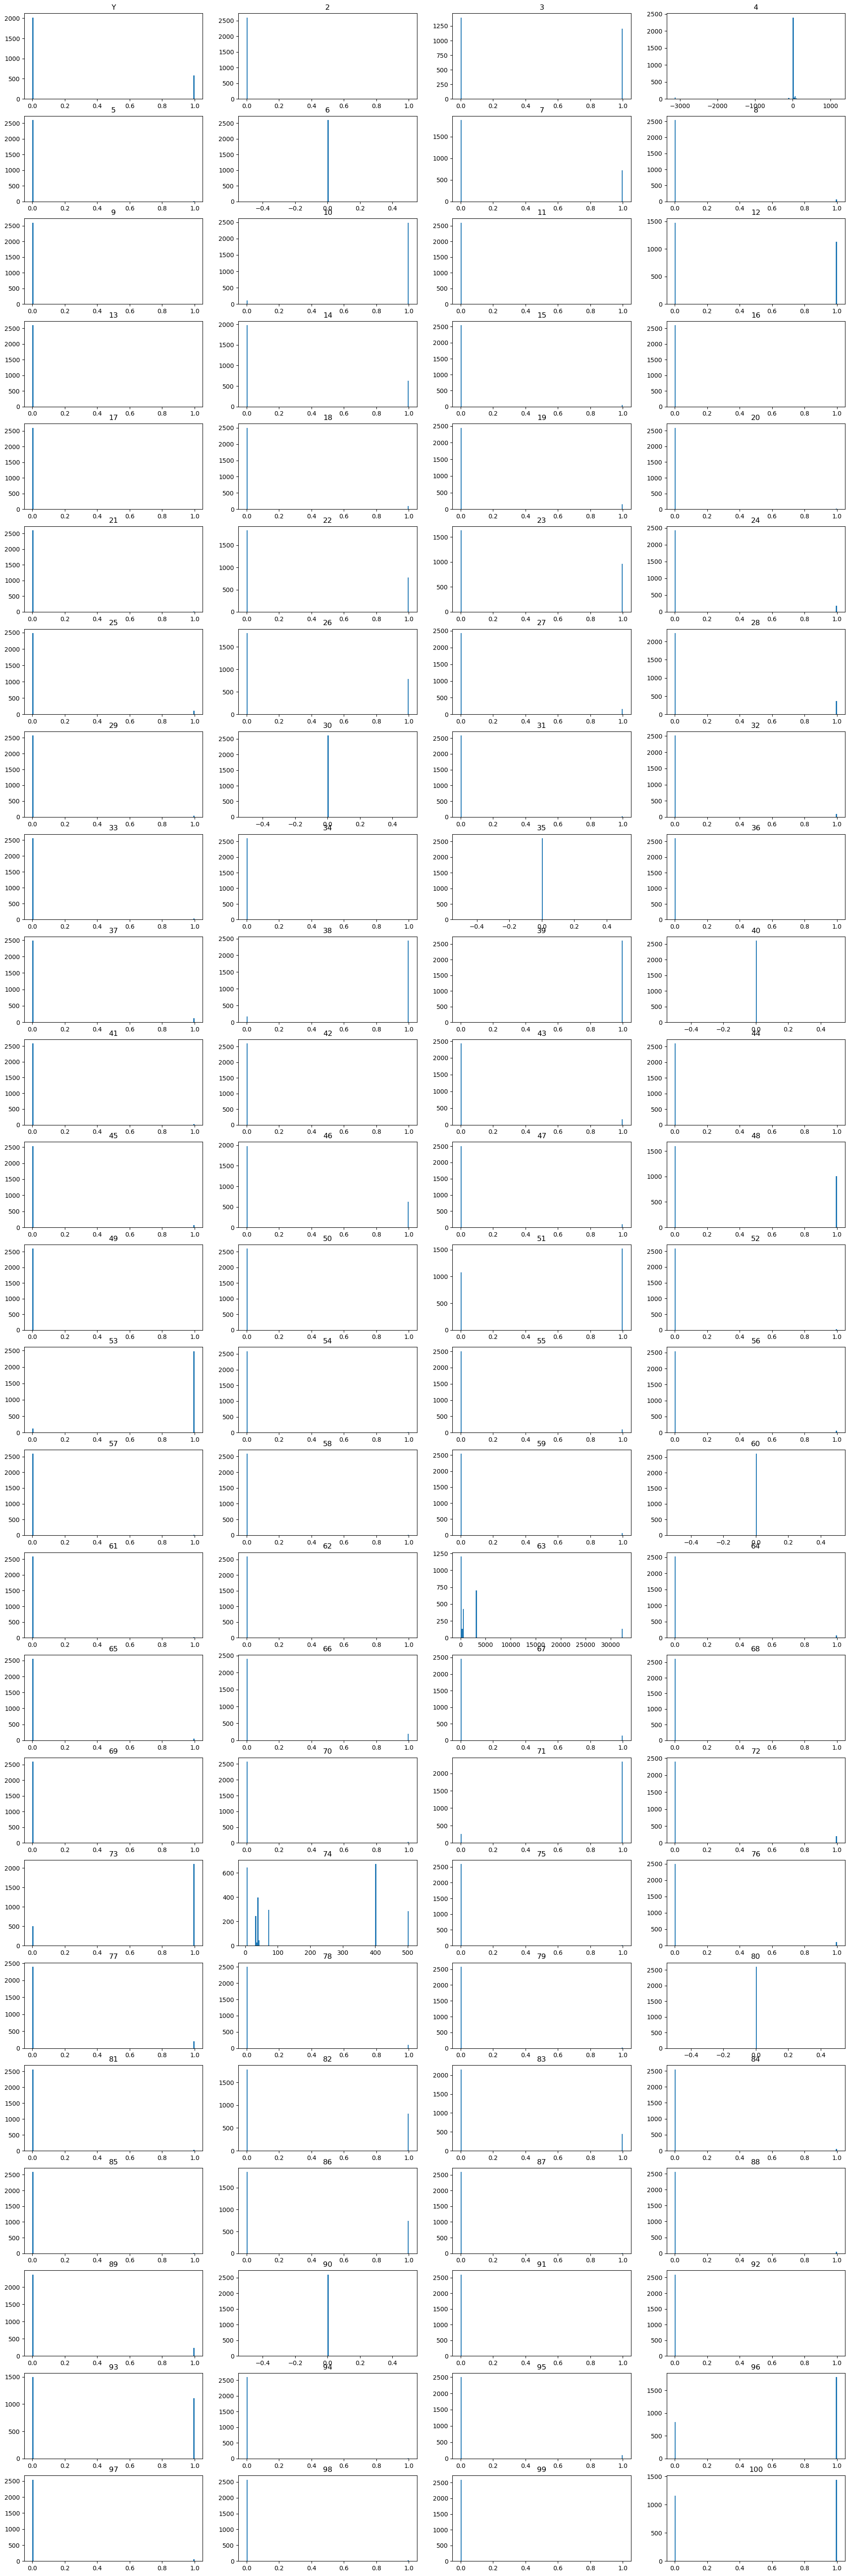

In [19]:
plot_dist(train_df.loc[:,train_df.columns[:100]], cols=4, figsize=(6,3))

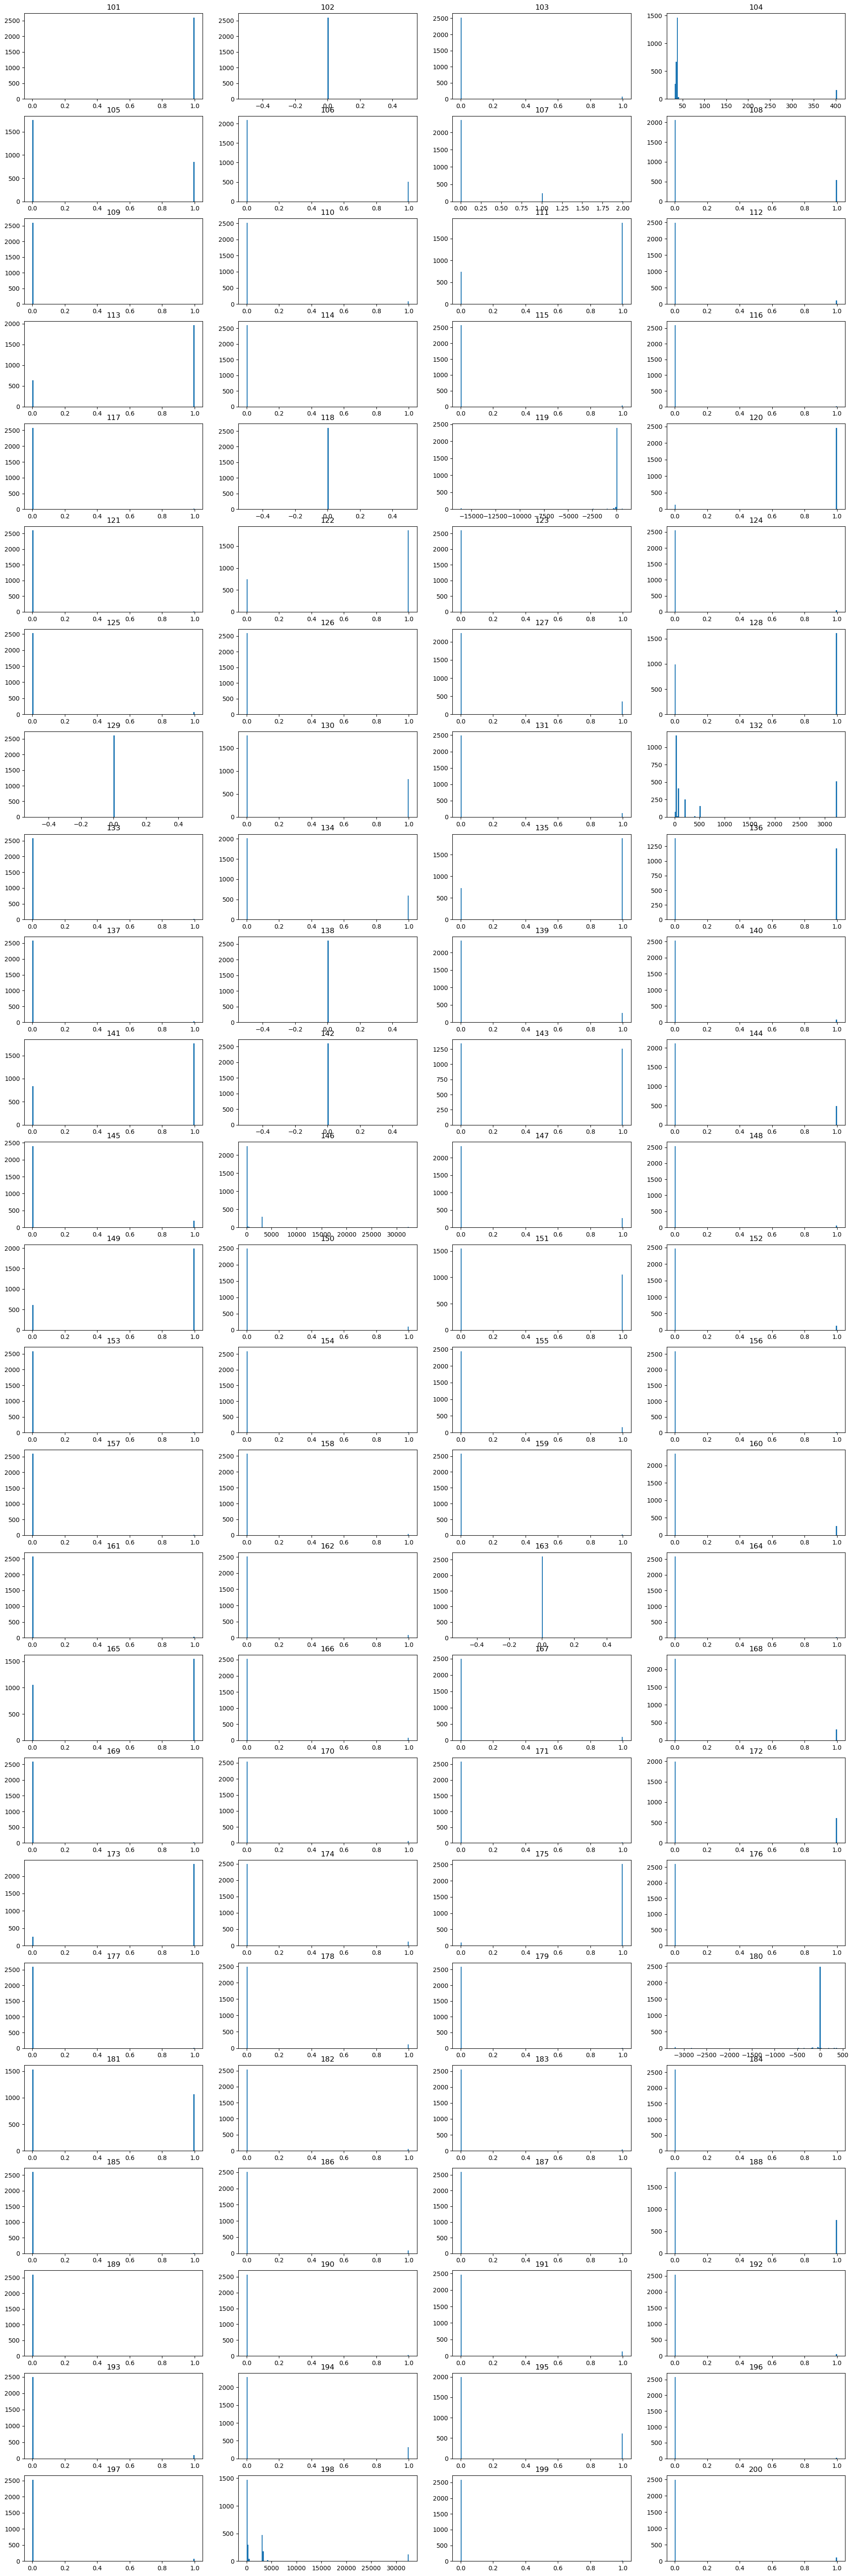

In [20]:
plot_dist(train_df.loc[:,train_df.columns[100:200]], cols=4, figsize=(6,3))

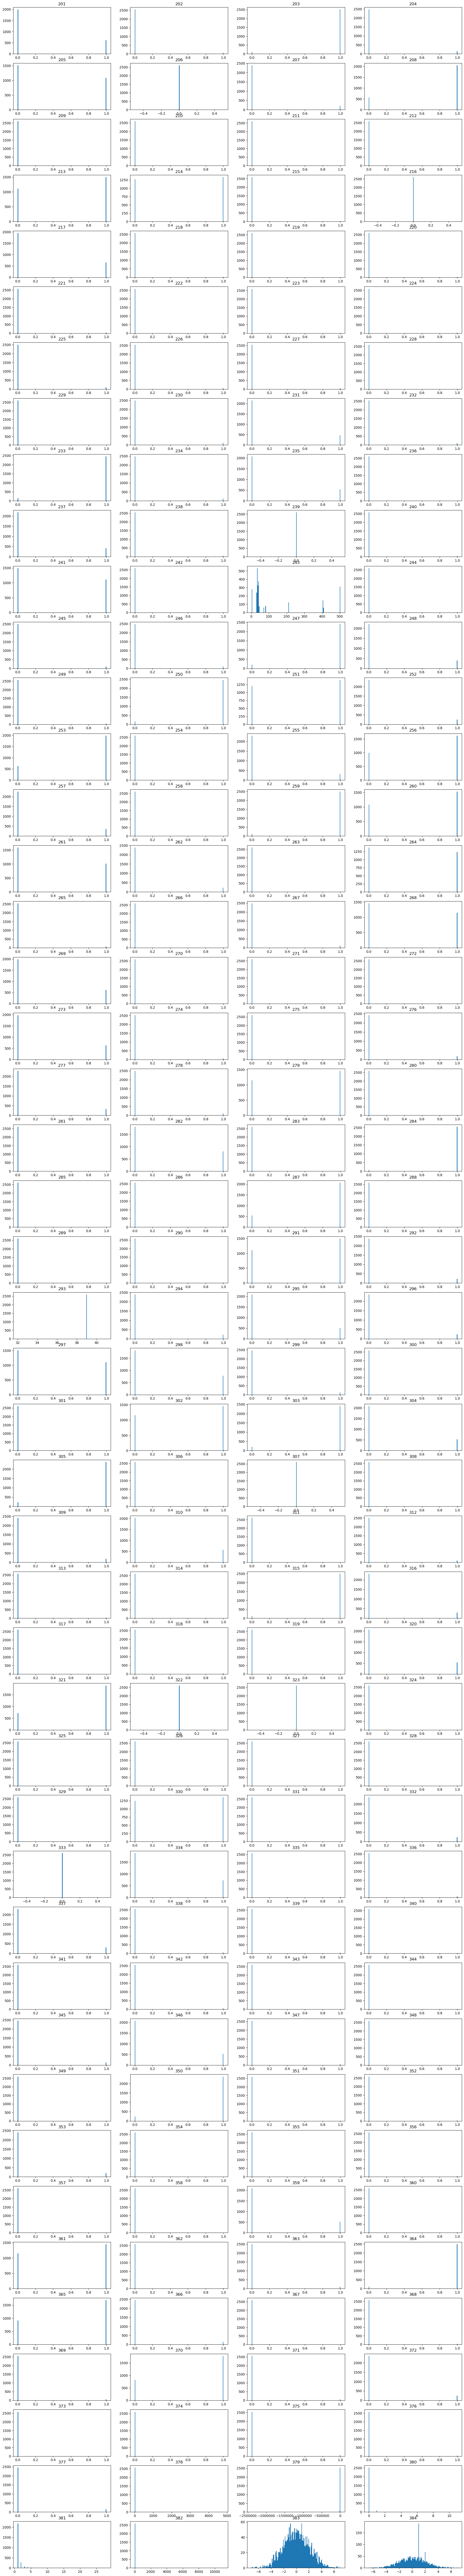

In [21]:
plot_dist(train_df.loc[:,train_df.columns[200:]], cols=4, figsize=(6,3))

In [32]:
def find_categorical(df):
    cat = []
    const = []
    contin = []
    for c in df.columns:
        x = len(df[c].value_counts())
        if x == 1:
            const.append(c)
            #print(f'Column {c} is likely CONSTANT')
        elif x < 3:
            #print(f'Column {c} is likely categorical w/ {x} categories')
            cat.append((c, x))
        else:
            #print(f'Columns {c} is likely continuous... Has {x} unique values')
            contin.append(c)

    return cat, const, contin

cat, const, contin = find_categorical(train_df)

In [29]:
#Drop all constants except 1
train_df = train_df.drop(const[1:], axis=1)
# Dont do anything for continuous

In [34]:
cat = np.array(cat)

In [41]:
np.where(cat[:, 1] != '2') # ALL Cateogires are binary, can be converted to 0, 1

(array([], dtype=int32),)

In [ ]:
def convert_categorical(df, columns):
    #For each column, fetch its unique values.
    #Convert one of them to 1, and the other to 0
    pass

# Notes from distributions:
- There are several features which are purely constant.
    - The entropy of all of these features combined is the same a single one of these features
    - All except one can be dropped

In [ ]:
# TODO 
    # 1. See if can identify continuous vs categorical datatypes
    # 2. Test out some random different model architectures
        #a. Random Forest
        #b. XGBoost
        #d. CNN - keras my boy i love uuuuuuuuuu

    # 3. Create a number of different accuracy functions
        # a. AUC ROC
        # b. Precision Recall

    # 4. Test out Ensembling most successful of each of the model archs

In [ ]:
# Testing different model architectures

# ================ XGBoost ===============

# ============= Random Forest ============

# ================== CNN =================

In [ ]:
# ========== Ensembling =================
